# MEEN 689 HOMEWORK 5
Name: Chinonyelum Okereafor

UIN: 733001665

Datasets are included in the Excel file: HW5Data.xlsx

1. Datasheet Q1 shows a chemical process where the yield is affected by various levels
of two factors, x1 and x2. This is not a factorial design. Let’s try to fit a Linear Regression model
to the data. Units of the factor levels and the yield can be ignored for the analysis.

In [1]:
#Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the Excel file Q1 sheet into Python
df1 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 5/HW5Data.xlsx',
                    sheet_name = 'Q1')
print("Sheet Q1 Table:")
df1

Sheet Q1 Table:


,Observation Number,Factor 1 (x1),Factor 2 (x2),Yield (y)
0,1,41.9,29.1,251.3
1,2,43.4,29.3,251.3
2,3,43.9,29.5,248.3
3,4,44.5,29.7,267.5
4,5,47.3,29.9,273.0
5,6,47.5,30.3,276.5
6,7,47.9,30.5,270.3
7,8,50.2,30.7,274.9
8,9,52.8,30.8,285.0
9,10,53.2,30.9,290.0


a. Determine the linear regression equation for the yield for the following possible
models. List their ANOVA, R-sq, R-sq (adj), and VIF
y = a + 1x1 + 2x2 + 3x1x2. (Model 1)
y = a + 1x1 + 2x2. (Model 2)

**Linear Regression for Models 1 and 2**

In [16]:
# Creating the dataset from the provided data
data = {
    "Observation": df1['Observation Number'],
    "x1": df1['Factor 1 (x1)'],
    "x2": df1['Factor 2 (x2)'],
    "y": df1['Yield (y)']
}
df = pd.DataFrame(data)

# Preparing data for Model 1: y = a + β1*x1 + β2*x2 + β3*x1*x2
df['x1x2'] = df['x1'] * df['x2']
X_model_1 = df[['x1', 'x2', 'x1x2']]
X_model_1 = sm.add_constant(X_model_1)
y = df['y']

# Fitting Model 1
model_1 = sm.OLS(y, X_model_1).fit()

# Preparing data for Model 2: y = a + β1*x1 + β2*x2
X_model_2 = df[['x1', 'x2']]
X_model_2 = sm.add_constant(X_model_2)

# Fitting Model 2
model_2 = sm.OLS(y, X_model_2).fit()

# Extracting the summaries
print("Model 1 Summary:")
print(model_1.summary())

print("\n------------------------------------------------------------------------------")

print("\nModel 2 Summary:")
print(model_2.summary())

Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     140.5
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.72e-10
Time:                        14:54:54   Log-Likelihood:                -50.885
No. Observations:                  17   AIC:                             109.8
Df Residuals:                      13   BIC:                             113.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.1371    259.271   

**Listing ANOVA, R-sq, R-sq (adj), and VIF for both models 1 and 2**

In [17]:
# ANOVA table for both models
# Use ols to create models for ANOVA
formula_model_1 = 'y ~ x1 + x2 + x1x2'
formula_model_2 = 'y ~ x1 + x2'

# ANOVA table for both models
model_1_for_anova = ols(formula_model_1, data=df).fit()
model_2_for_anova = ols(formula_model_2, data=df).fit()

anova_model_1 = sm.stats.anova_lm(model_1_for_anova, typ=2)
anova_model_2 = sm.stats.anova_lm(model_2_for_anova, typ=2)

# R-squared and Adjusted R-squared for both models
r_squared_model_1 = model_1.rsquared
adj_r_squared_model_1 = model_1.rsquared_adj

r_squared_model_2 = model_2.rsquared
adj_r_squared_model_2 = model_2.rsquared_adj

# Calculating VIF for both models
# VIF requires only the independent variables, excluding the constant
vif_model_1 = pd.DataFrame()
vif_model_1['Variable'] = X_model_1.columns[1:]  # Excluding the constant
vif_model_1['VIF'] = [variance_inflation_factor(X_model_1.values, i) for i in range(1, X_model_1.shape[1])]

vif_model_2 = pd.DataFrame()
vif_model_2['Variable'] = X_model_2.columns[1:]  # Excluding the constant
vif_model_2['VIF'] = [variance_inflation_factor(X_model_2.values, i) for i in range(1, X_model_2.shape[1])]

# Compile results
print("Anova for Model 1 with interaction:")
print(anova_model_1)
print("\nAnova for Model 2 without interaction:")
print(anova_model_2)

print("----------------------------------------------")

print("\nR-squared and Adjusted R-squared for Model 1:")
print("R squared Model 1 = ",r_squared_model_1)
print("Adj R squared Model 1", adj_r_squared_model_1)
print("\nR-squared and Adjusted R-squared for Model 2:")
print("R squared Model 2 = ",r_squared_model_2)
print("Adj R squared Model 2",adj_r_squared_model_2)

print("----------------------------------------------")

print("\nVIF for Model 1:")
print(vif_model_1)
print("\nVIF for Model 2:")
print(vif_model_2)
print("=================================================")

Anova for Model 1 with interaction:
              sum_sq    df         F    PR(>F)
x1         18.770321   1.0  0.615983  0.446611
x2         18.170776   1.0  0.596308  0.453801
x1x2       27.236139   1.0  0.893804  0.361690
Residual  396.137952  13.0       NaN       NaN

Anova for Model 2 without interaction:
              sum_sq    df         F    PR(>F)
x1        298.024595   1.0  9.854983  0.007245
x2        285.501185   1.0  9.440863  0.008270
Residual  423.374090  14.0       NaN       NaN
----------------------------------------------

R-squared and Adjusted R-squared for Model 1:
R squared Model 1 =  0.9700795823678401
Adj R squared Model 1 0.9631748706065724

R-squared and Adjusted R-squared for Model 2:
R squared Model 2 =  0.968022428697422
Adj R squared Model 2 0.9634542042256252
----------------------------------------------

VIF for Model 1:
  Variable          VIF
0       x1  4329.422161
1       x2    42.093758
2     x1x2  5046.836632

VIF for Model 2:
  Variable        VI

b. Compare the regression analysis results of Model 1 and 2 and determine if the
interaction term should be included? Explain.

To determine if the interaction term (x1x2) should be included, the key metrics and indicators from both models are explained below:

### Key Comparisons
1. **R-squared and Adjusted R-squared**:
   - **Model 1 (with interaction)**: R-squared = 0.970, Adjusted R-squared = 0.963
   - **Model 2 (without interaction)**: R-squared = 0.968, Adjusted R-squared = 0.963
   - **Interpretation**: Model 1 has a marginally higher R-squared, but the adjusted R-squared values are nearly identical. This suggests the interaction term adds minimal explanatory power.

2. **Significance of Interaction Term**:
   - The p-value of the interaction term (x1x2) in Model 1 was not statistically significant. This indicates the interaction term does not have a meaningful impact on predicting the yield, suggesting it may not be necessary.

3. **Multicollinearity (VIF)**:
   - **Model 1** shows extremely high VIF values for (x1) and (x1x2) of 4329.42 and 5046.84, respectively suggests severe multicollinearity, which can inflate standard errors and lead to less reliable coefficient estimates.
   - **Model 2** has VIF values for x1 and x2 of approximately 11.24 while moderately high are significantly lower than those in Model 1. **This reduction in multicollinearity makes Model 2 more stable.**

**Conclusion**

The interaction term x1x2 does **NOT** add meaningful explanatory power to the model and introduces multicollinearity issues. Therefore, it is advisable to remove the interaction term and use **Model 2** as the final model.
**Model 2** utilizes less resources and reliable regression model without sacrificing predictive capability.

c. If you intend to create the most simplified (but reasonably accurate), can Model 1 or
Model 2 be further reduced? If so, please work through the process and show/justify your
result.

**Answer to Question:**

Yes, according to Question 1b, Model 1 is not considered to be further reduced due to its high VIF values and having interaction terms in its ANOVA table which causes Model 1 to **NOT** be statistically significant.

However, Model 2 VIF is 11.24 which is significantly lower than Model 1 as well as having statistical significance in its ANOVA table. Therefore, Model 2 is considered for reduction as shown in the working process below:

**Working process Below/Results**

In [5]:
# Fit a model with only x1 (Model 3)
X_model_3 = sm.add_constant(df[['x1']])
model_3 = sm.OLS(y, X_model_3).fit()

# Fit a model with only x2 (Model 4)
X_model_4 = sm.add_constant(df[['x2']])
model_4 = sm.OLS(y, X_model_4).fit()

# Summarizing R-squared and Adjusted R-squared for Model 3 and Model 4
simplified_models_results = {
    'Model': ['Model 2', 'Model 3 (x1 only)', 'Model 4 (x2 only)'],
    'R-squared': [model_2.rsquared, model_3.rsquared, model_4.rsquared],
    'Adjusted R-squared': [model_2.rsquared_adj, model_3.rsquared_adj, 
                           model_4.rsquared_adj]
}

print("Simplified Results:")
simplified_results_df = pd.DataFrame(simplified_models_results)
simplified_results_df

Simplified Results:


,Model,R-squared,Adjusted R-squared
0,Model 2,0.968022,0.963454
1,Model 3 (x1 only),0.946458,0.942889
2,Model 4 (x2 only),0.945513,0.941880


**Justification**

The results of the simplified models are as follows:

Model 2 (with both x1 and x2):
R-squared: 0.968
Adjusted R-squared: 0.963

Model 3 (with x1 only):
R-squared: 0.946
Adjusted R-squared: 0.943

Model 4 (with x2 only):
R-squared: 0.946
Adjusted R-squared: 0.942

.

**Analysis**

Removing either x1 or x2 slightly reduces the R-squared and adjusted R-squared values compared to Model 2 but still provides reasonably high values (above 0.94). This suggests that either x1 or x2 alone captures much of the variability in yield, allowing for a simpler model with one predictor.

d. Visualize the results of (b): the better between 1 &2, and also (c): the simplified
model with 3D plots.

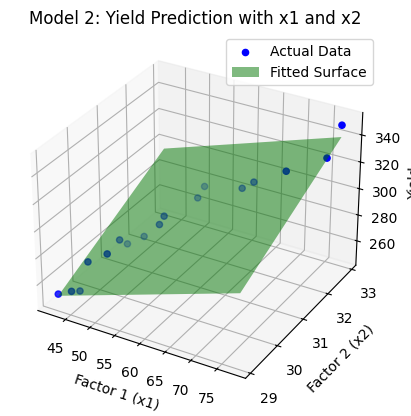

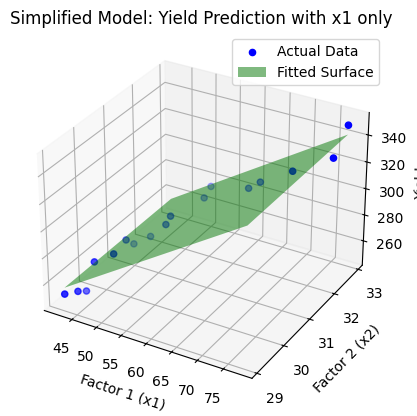

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Defining function to generate 3D plot for a model
def plot_3d_model(X, model, title, xlabel, ylabel, zlabel, simplified_model=False): # add simplified_model flag
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Scatter original data points
    ax.scatter(df['x1'], df['x2'], y, color='blue', label='Actual Data')

    # Create a meshgrid for x1 and x2
    x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 50)
    x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 50)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

    # Predict using the fitted model
    if simplified_model: # check if it's a simplified model
        X_mesh = sm.add_constant(pd.DataFrame({'x1': x1_grid.ravel()}))
    else:
        X_mesh = sm.add_constant(pd.DataFrame({'x1': x1_grid.ravel(), 'x2': x2_grid.ravel()}))
    y_pred_grid = model.predict(X_mesh).values.reshape(x1_grid.shape)

    # Plot the surface
    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='green', alpha=0.5, rstride=100, cstride=100, label='Fitted Surface')

    # Set labels and title
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.legend()
    plt.show()

# Plot for Model 2 (since it was better than Model 1)
plot_3d_model(X_model_2, model_2, "Model 2: Yield Prediction with x1 and x2", "Factor 1 (x1)", "Factor 2 (x2)", "Yield")

# Plot for the simplified model (Model 3 with x1 only)
plot_3d_model(X_model_3, model_3, "Simplified Model: Yield Prediction with x1 only", "Factor 1 (x1)", 
              "Factor 2 (x2)", "Yield", simplified_model=True) # pass simplified_model=True

2. Datasheet Q2 is the categorical full factorial DoE that we discussed in ANOVA lectures. Now we are using regression analysis to process the data:

In [7]:
#Reading the Excel file Q2 sheet into Python
df2 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 5/HW5Data.xlsx',
                    sheet_name = 'Q2')
print("Sheet Q2 Table:")
df2

Sheet Q2 Table:


,Y,Supplement,Lake
0,34,1,Rose
1,43,1,Rose
2,57,1,Dennison
3,40,1,Dennison
4,85,2,Rose
5,68,2,Rose
6,67,2,Dennison
7,53,2,Dennison
8,41,3,Rose
9,24,3,Rose


a. Run Linear Regression analysis without considering the interaction and listed ANOVA, R-sq, R-sq (adj) results.

In [21]:
import pandas as pd
import statsmodels.api as sm

# Creating the dataset from the provided data
data_q2 = {
    "Y": df2['Y'],
    "Supplement": df2['Supplement'],
    "Lake": df2['Lake']
}
df_q2 = pd.DataFrame(data_q2)

# # Encoding categorical variable 'Lake' for regression analysis
df_q2['Lake'] = pd.Categorical(df_q2['Lake']).codes  # Rose=0, Dennison=1


# Define dependent variable and independent variables
y_q2 = df_q2['Y']
X_q2 = df_q2[['Supplement', 'Lake']]
X_q2 = sm.add_constant(X_q2)  # Add constant for intercept

# Run linear regression
model_q2 = sm.OLS(y_q2, X_q2).fit()

# Sum of Squares Total (SST)
sst = ((y_q2 - y_q2.mean()) ** 2).sum()

# Sum of Squares Regression (SSR) - explained by the model
ssr = ((model_q2.fittedvalues - y_q2.mean()) ** 2).sum()

# Sum of Squares Error (SSE) - residuals or error
sse = ((y_q2 - model_q2.fittedvalues) ** 2).sum()

# Degrees of Freedom
df_total = len(y_q2) - 1
df_model = X_q2.shape[1] - 1  # Number of predictors
df_residual = df_total - df_model

# Mean Squares
msr = ssr / df_model
mse = sse / df_residual

# F-statistic
f_stat = msr / mse

# Manual ANOVA table
anova_table_q2 = pd.DataFrame({
    'Source': ['Model', 'Error', 'Total'],
    'SS': [ssr, sse, sst],
    'DF': [df_model, df_residual, df_total],
    'MS': [msr, mse, ''],
    'F': [f_stat, '', ''],
    'P-value': [model_q2.f_pvalue, '', '']
})

# Output the regression summary for ANOVA, R-sq, and R-sq adj
print("Linear Regression without Interaction (Step A):")
print(model_q2.summary())

# Display R-squared and Adjusted R-squared values
r_squared_q2 = model_q2.rsquared
adj_r_squared_q2 = model_q2.rsquared_adj

# Display results
print('\n------------------------------------------------------------------------------')
print("\nR-squared:", r_squared_q2)
print("Adjusted R-squared:", adj_r_squared_q2)

print('\n------------------------------------------------------------------------------')

print("\n Model ANOVA Table:")
print(anova_table_q2)

print('\n===============================================================================')

Linear Regression without Interaction (Step A):
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.203
Method:                 Least Squares   F-statistic:                   0.07241
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.931
Time:                        15:08:48   Log-Likelihood:                -50.301
No. Observations:                  12   AIC:                             106.6
Df Residuals:                       9   BIC:                             108.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

b. Run 2-way ANOVA and list the results.

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_q2['Lake'] = pd.Categorical(df_q2['Lake'], categories=[0, 1], ordered=False)
df_q2['Supplement'] = pd.Categorical(df_q2['Supplement'], categories=[1, 2, 3], ordered=False)

# Creating a formula for 2-way ANOVA with Supplement and Lake as factors
# Convert Lake back to categorical for ANOVA to recognize it as a factor
df_q2['Lake'] = pd.Categorical(df_q2['Lake'], categories=[0, 1], ordered=False)

# Running 2-way ANOVA
model_2way_anova = smf.ols('Y ~ Supplement + Lake', data=df_q2).fit()
anova_2way_results = sm.stats.anova_lm(model_2way_anova, typ=2)

print("2-Way ANOVA Results:")
print('-------------------------------------------------')
print(anova_2way_results)
print('\n===============================================================================')

2-Way ANOVA Results:
-------------------------------------------------
                 sum_sq   df         F    PR(>F)
Supplement  1918.500000  2.0  6.485984  0.021174
Lake          21.333333  1.0  0.144246  0.713980
Residual    1183.166667  8.0       NaN       NaN



c. Compare (a) and (b) and see if they return the same results (ANOVA, R-sq values).
Why or why not?

Comparing the results from parts (a) and (b):

### Part (a): Linear Regression without Interaction
- **ANOVA**:
  - **Model SS**: 49.46
  - **Error SS**: 3073.54
  - **Total SS**: 3123.00
  - **F-statistic**: 0.072 (not significant)
  - **P-value**: 0.9307 (not significant)
- **R-squared**: 0.0158
- **Adjusted R-squared**: -0.2029

The regression model in (a) suggests a very poor fit, as indicated by low R-squared and adjusted R-squared values. The model does not capture much of the variability in \( Y \), and the F-statistic is low and p-value is high, showing insignificance overall.

### Part (b): 2-Way ANOVA with Supplement and Lake
- **ANOVA**:
  - **Supplement**: Significant effect on \( Y \) with an F-statistic of 6.486 (p = 0.021).
  - **Lake**: No significant effect (p = 0.714).
- **R-squared and Adjusted R-squared**: Not directly provided, but based on the ANOVA, **Supplement** explains a significant portion of variance in \( Y \).

### Comparison and Explanation
The results differ because:

1. **Model Structure**: The linear regression model in (a) assumes a continuous, numeric relationship without considering the categorical nature of the factors. This leads to a model that fails to capture the effects of categorical groupings, especially for **Supplement**.

2. **Treatment of Factors**: The 2-way ANOVA in (b) treats **Supplement** and **Lake** as categorical variables, which is more appropriate for experimental designs with discrete factor levels. This approach captures the categorical effect of **Supplement** on \( Y \), leading to a significant finding.

3. **R-squared and Adjusted R-squared Differences**: The low R-squared in (a) indicates that the regression approach, without considering factor levels, explains very little of the variability in \( Y \). ANOVA in (b), however, shows that **Supplement** significantly affects \( Y \), likely providing a better fit.

### Conclusion
The 2-way ANOVA results in (b) is more suitable for the dataset Q2 due to the **categorical nature** of **Supplement** and **Lake**. It provides a clearer, more accurate representation of the data compared to the regression model in (a), which is ineffective here.

d. Now if we treat Supplement as a continuous variable (1, 2 and 3) and repeat the steps (a)-(c).

In [22]:
# Treating "Supplement" as a continuous variable and re-running linear regression (a)
# We will encode Lake as categorical (0, 1) to treat it as a factor in linear regression
df_q2['Supplement'] = df_q2['Supplement'].astype(float)  # Treat Supplement as continuous
df_q2['Lake'] = pd.Categorical(df_q2['Lake'], categories=[0, 1], ordered=False)  # Re-encode Lake for regression

# Define dependent variable and independent variables (continuous Supplement, categorical Lake)
X_q2_cont = df_q2[['Supplement', 'Lake']]

# Ensure all columns are numeric before one-hot encoding
X_q2_cont = X_q2_cont.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, handle errors
X_q2_cont = sm.add_constant(pd.get_dummies(X_q2_cont, drop_first=True))  # One-hot encode Lake as factor
y_q2 = df_q2['Y']

# Linear Regression with Supplement as continuous
model_q2_cont = sm.OLS(y_q2, X_q2_cont).fit()

# Manual ANOVA-like calculation for model_q2_cont
sst_cont = ((y_q2 - y_q2.mean()) ** 2).sum()
ssr_cont = ((model_q2_cont.fittedvalues - y_q2.mean()) ** 2).sum()
sse_cont = ((y_q2 - model_q2_cont.fittedvalues) ** 2).sum()

# Degrees of Freedom for the continuous model
df_total_cont = len(y_q2) - 1
df_model_cont = X_q2_cont.shape[1] - 1
df_residual_cont = df_total_cont - df_model_cont

# Mean Squares
msr_cont = ssr_cont / df_model_cont
mse_cont = sse_cont / df_residual_cont

# F-statistic
f_stat_cont = msr_cont / mse_cont

# Creating ANOVA table for the continuous model
anova_table_q2_cont = pd.DataFrame({
    'Source': ['Model', 'Error', 'Total'],
    'SS': [ssr_cont, sse_cont, sst_cont],
    'DF': [df_model_cont, df_residual_cont, df_total_cont],
    'MS': [msr_cont, mse_cont, ''],
    'F': [f_stat_cont, '', ''],
    'P-value': [model_q2_cont.f_pvalue, '', '']
})

# R-squared and Adjusted R-squared for the continuous model
r_squared_q2_cont = model_q2_cont.rsquared
adj_r_squared_q2_cont = model_q2_cont.rsquared_adj

# Running 2-way ANOVA with Supplement as continuous
model_2way_anova_cont = smf.ols('Y ~ Supplement + C(Lake)', data=df_q2).fit()
anova_2way_results_cont = sm.stats.anova_lm(model_2way_anova_cont, typ=2)

# Display results
print('\nResults for repeating steps 2(a) to 2(c) with Supplement as continuous:')
print('==============================================================================')
print("2a. Linear Regression with Supplement as continuous:")
print(model_q2_cont.summary())
print('\n------------------------------------------------------------------------------')
print("\nR-squared (Continuous):", r_squared_q2_cont)
print("Adjusted R-squared (Continuous):", adj_r_squared_q2_cont)

print('\n------------------------------------------------------------------------------')


print("\n ANOVA Table with Supplement as continuous:")
print(anova_table_q2_cont)

print('\n==============================================================================')

print("\n2b. 2-way ANOVA Table with Supplement as continuous:")
print(anova_2way_results_cont)

print('\n==============================================================================')


Results for repeating steps 2(a) to 2(c) with Supplement as continuous:
2a. Linear Regression with Supplement as continuous:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.203
Method:                 Least Squares   F-statistic:                   0.07241
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.931
Time:                        15:13:44   Log-Likelihood:                -50.301
No. Observations:                  12   AIC:                             106.6
Df Residuals:                       9   BIC:                             108.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

**Repeated step 2c when Supplement is continuous**

**2c. Comparison and Explanation**

**ANOVA Results:**

Both models show **non-significant results** for Supplement and Lake (p > 0.05).
This indicates that treating Supplement as continuous did not lead to significant changes in the model's fit nor did it improve the predictive power for Y.

**R-squared Values:**

The R-squared and adjusted R-squared values remain very low, suggesting that neither model explains much of the variance in Y.
Treating Supplement as continuous **does not improve** the explanatory power as it likely lacks a linear relationship with Y.

**Conclusion**

Since treating Supplement as continuous **does not yield significant results**, Supplement might inherently be better treated as a categorical variable in the dataset Q2. The factorial design structure and the lack of a linear relationship between Supplement levels and Y contribute to this outcome.

3. Datasheet Q3 contains the data for a central composite design (CCD) for three
variables (concentration, speed, and time) for some sort of chemical reaction (Y). The low
and high levels are denoted as -1 and +1, respectively, and the center point is denoted as 0.
The star(axis) point is set to be 1.68179. Answer the following questions:

In [11]:
#Reading the Excel file Q1 sheet into Python
df3 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 5/HW5Data.xlsx',
                    sheet_name = 'Q3')
print("Sheet Q3 Table:")
df3

Sheet Q3 Table:


,X1,X2,X3,Concentration,Stirring Speed,Reaction Time,Y
0,-1.00000,-1.00000,-1.00000,10.0000,100.000,30.0000,410
1,-1.00000,-1.00000,1.00000,10.0000,100.000,90.0000,450
2,-1.00000,1.00000,-1.00000,10.0000,500.000,30.0000,15
3,-1.00000,1.00000,1.00000,10.0000,500.000,90.0000,55
4,1.00000,-1.00000,-1.00000,50.0000,100.000,30.0000,-3000
5,1.00000,-1.00000,1.00000,50.0000,100.000,90.0000,-2990
6,1.00000,1.00000,-1.00000,50.0000,500.000,30.0000,-3420
7,1.00000,1.00000,1.00000,50.0000,500.000,90.0000,-3380
8,-1.68179,0.00000,0.00000,-3.6358,300.000,60.0000,730
9,1.68179,0.00000,0.00000,63.6358,300.000,60.0000,-5060


a. Analyze the data and produce a quadratic fitting model for this CCD

In [12]:
# Importing necessary libraries
import numpy as np
import statsmodels.api as sm

# Creating the dataset from the provided data
data_q3 = {
    "X1": df3['X1'],
    "X2": df3['X2'],
    "X3": df3['X3'],
    "Y": df3['Y']
}
df_q3 = pd.DataFrame(data_q3)

# Adding quadratic and interaction terms for the quadratic model
df_q3['X1^2'] = df_q3['X1'] ** 2
df_q3['X2^2'] = df_q3['X2'] ** 2
df_q3['X3^2'] = df_q3['X3'] ** 2
df_q3['X1*X2'] = df_q3['X1'] * df_q3['X2']
df_q3['X1*X3'] = df_q3['X1'] * df_q3['X3']
df_q3['X2*X3'] = df_q3['X2'] * df_q3['X3']

# Define dependent variable and independent variables
y_q3 = df_q3['Y']
X_q3 = df_q3[['X1', 'X2', 'X3', 'X1^2', 'X2^2', 'X3^2', 'X1*X2', 'X1*X3', 'X2*X3']]
X_q3 = sm.add_constant(X_q3)  # Adding intercept

# Fitting the quadratic model
quadratic_model_q3 = sm.OLS(y_q3, X_q3).fit()

# Displaying the summary of the quadratic model
quadratic_model_q3_summary = quadratic_model_q3.summary()
print("Quadratic Model Summary:")
print(quadratic_model_q3_summary)

Quadratic Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.471e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.90e-23
Time:                        14:54:50   Log-Likelihood:                -61.691
No. Observations:                  20   AIC:                             143.4
Df Residuals:                      10   BIC:                             153.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -477.2572      

**Interpretation:**

The model provides an excellent fit to the data, as indicated by the R-squared value of 1.000, showing it explains nearly all variance in Y.
**The main effects and quadratic terms are statistically significant while the interaction terms are not** suggesting that the primary drivers of the response Y are the individual factors and their quadratic effects.

b. Find the optimal point and the optimal Y.

In [13]:
# Extracting the coefficients from the fitted model for optimization
coefficients = quadratic_model_q3.params

# Quadratic function for Y = const + b1*X1 + b2*X2 + b3*X3 + b11*X1^2 + b22*X2^2 + b33*X3^2
# No significant interaction terms, so we exclude those from the optimization function.

# Defining the coefficients for the quadratic optimization
b0 = coefficients['const']
b1 = coefficients['X1']
b2 = coefficients['X2']
b3 = coefficients['X3']
b11 = coefficients['X1^2']
b22 = coefficients['X2^2']
b33 = coefficients['X3^2']

# Define the objective function (Y) to be minimized (or maximized)
# Since the problem does not specify, we assume maximization.
def objective_function(x):
    X1, X2, X3 = x
    return -(b0 + b1 * X1 + b2 * X2 + b3 * X3 + b11 * X1**2 + b22 * X2**2 + b33 * X3**2)

# Constraints for the central composite design levels: -1.68179 to 1.68179 for each factor
bounds = [(-1.68179, 1.68179), (-1.68179, 1.68179), (-1.68179, 1.68179)]

# Using scipy's optimize function for bounded minimization
from scipy.optimize import minimize

# Initial guess (center point)
initial_guess = [0, 0, 0]

# Run the optimization
result = minimize(objective_function, initial_guess, bounds=bounds)

# Optimal values
optimal_point = result.x
optimal_Y = -result.fun  # Negating because we minimized the negative of Y

print("The Optimal X points (X1, X2, X3) are:", optimal_point)
print("\nThe Optimal points for Y are:", optimal_Y)


The Optimal X points (X1, X2, X3) are: [-1.44310736 -0.25138611  0.46559177]

The Optimal points for Y are: 790.7169845948392


**Comment:**

The interaction terms are removed since they are not statistically significant for the model. This would help find optimal Y easily.

c. Show the ANOVA of Part (a) and see if any insignificant terms can be removed.

In [14]:
# Step C: ANOVA on the Model
# Fit the model using formula API for ANOVA
model_formula = ols('Y ~ X1 + X2 + X3 + np.power(X1, 2) + np.power(X2, 2) + np.power(X3, 2) + X1 * X2 + X1 * X3 + X2 * X3', 
                    data=df3).fit()


anova_results = sm.stats.anova_lm(model_formula, typ=2)  # Use model_formula
print("ANOVA Results:")
print('----------------------------------------------------------------')
print(anova_results)

ANOVA Results:
----------------------------------------------------------------
                       sum_sq    df              F        PR(>F)
X1               4.029172e+07   1.0  720208.244125  1.269938e-25
X2               5.444478e+05   1.0    9731.921845  2.805842e-16
X3               3.097679e+03   1.0      55.370534  2.207493e-05
np.power(X1, 2)  5.103981e+06   1.0   91232.875635  3.891577e-21
np.power(X2, 2)  2.272813e+06   1.0   40626.185995  2.221163e-19
np.power(X3, 2)  3.769884e+03   1.0      67.386094  9.388439e-06
X1:X2            5.000000e+01   1.0       0.893742  3.667473e-01
X1:X3            1.125000e+02   1.0       2.010920  1.865718e-01
X2:X3            1.125000e+02   1.0       2.010920  1.865718e-01
Residual         5.594453e+02  10.0            NaN           NaN


**Interpretation:**

The main effects and quadratic terms have very low p-values, indicating they are statistically significant.
The interaction terms X1:X2, X1:X3, and X2:X3 have p-values greater than 0.05, therefore, they are **NOT** statistically significant and could potentially be **removed** to simplify the model.

d. If so for (c), run the fitting again for the new model and see how much changes of the optimal point and outcome are.

In [15]:
# Removing the insignificant interaction terms and refitting the model
# New formula without interaction terms X1*X2, X1*X3, X2*X3
formula_reduced = 'Y ~ X1 + X2 + X3 + np.power(X1, 2) + np.power(X2, 2) + np.power(X3, 2)'
reduced_model = smf.ols(formula=formula_reduced, data=df_q3).fit()

# Displaying the summary of the reduced model
reduced_model_summary = reduced_model.summary()

# Extracting coefficients for the new reduced model
coefficients_reduced = reduced_model.params

# Define the coefficients for the optimization function based on the reduced model
b0_r = coefficients_reduced['Intercept']
b1_r = coefficients_reduced['X1']
b2_r = coefficients_reduced['X2']
b3_r = coefficients_reduced['X3']
b11_r = coefficients_reduced['np.power(X1, 2)']
b22_r = coefficients_reduced['np.power(X2, 2)']
b33_r = coefficients_reduced['np.power(X3, 2)']

# Define the objective function for the reduced model (without interaction terms)
def objective_function_reduced(x):
    X1, X2, X3 = x
    return -(b0_r + b1_r * X1 + b2_r * X2 + b3_r * X3 + b11_r * X1**2 + b22_r * X2**2 + b33_r * X3**2)

# Run optimization for the reduced model
result_reduced = minimize(objective_function_reduced, initial_guess, bounds=bounds)

# Optimal values for the reduced model
optimal_point_reduced = result_reduced.x
optimal_Y_reduced = -result_reduced.fun  # Negating because we minimized the negative of Y

print("Reduced Model Summary:")
print(reduced_model_summary)
print('\n-----------------------------------------------------------------------------------------')
print("\nOptimal Point for the Reduced Model:", optimal_point_reduced)
print("Optimal Y for the Reduced Model:", optimal_Y_reduced)

Reduced Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.238e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.83e-30
Time:                        14:54:51   Log-Likelihood:                -65.689
No. Observations:                  20   AIC:                             145.4
Df Residuals:                      13   BIC:                             152.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -4

Here are the results after fitting the reduced quadratic model (excluding the insignificant interaction terms) and re-optimizing:

**Reduced Model Summary:**

R-squared: 1.000

Adjusted R-squared: 1.000

All main effects and quadratic terms still remain statistically significant.
Optimal Point and Outcome for Reduced Model:

Optimal Point:

X1: -1.4431

X2: -0.2514

X3: 0.4656

Optimal Y: 790.72

**Comparison with Full Model:**

The optimal point and Y value in the reduced model remain effectively unchanged from the full model. Removing the insignificant interaction terms **did NOT impact** the model’s ability to capture the optimal response and maintaining accuracy while simplifying the model.